#### Amazinum. Moisei. Task 7:
- MLPClassifier for Brest Cancer Dataset;
- Signs dataset with writing codes and CLS.

#### Brest Cancer Dataset

In [236]:
import os
import h5py
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data') 

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

X, y = load_breast_cancer(return_X_y= True)

print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)

X.shape=  (569, 30)
y.shape=  (569,)


In [237]:
X_train, X_test, y_train, y_test  =  train_test_split(X, y, random_state= 0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(
    solver= 'adam',
    hidden_layer_sizes= (100,100),
    random_state = 0
).fit(X_train,y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test,y_test)))

train accuracy= 91.315%
test accuracy= 90.909%


In [238]:
clf = MLPClassifier(
    solver= 'adam',
    hidden_layer_sizes= (100,10),
    random_state = 0,
    alpha= 5
).fit(X_train_scaled,y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled,y_test)))

train accuracy= 97.653%
test accuracy= 96.503%


#### Signs dataset

#### Load dataset (fingers)

In [239]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data') 

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# signs data set (fingers)
def load_dataset():
    fn =  os.path.join('train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn =  os.path.join('test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes

In [240]:
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


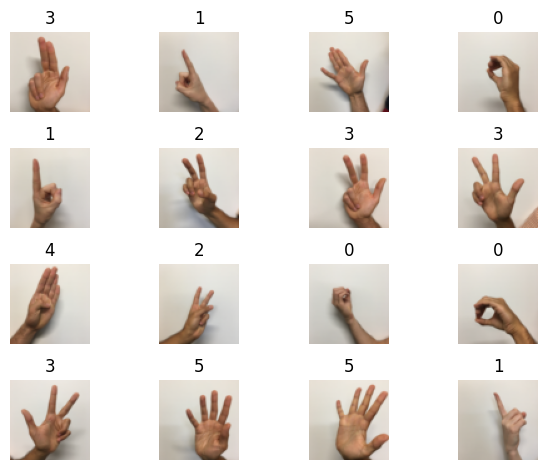

<Figure size 640x480 with 0 Axes>

In [241]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)
    
    plt.figure()

display_samples_in_grid(X= X_train, n_rows=4, y= y_train)

In [242]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [243]:
# YOUR_CODE.  Preproces data
# START_CODE 
# END_CODE

# Flatten the training and test images
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T
# Scale-normalisation image vectors
X_train_scaled = X_train_flatten/255.
X_test_scaled = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(y_train, 6)
Y_test = convert_to_one_hot(y_test, 6)

print ("number of training examples = " + str(X_train_scaled.shape[0]))
print ("number of test examples = " + str(X_test_scaled.shape[0]))
print ("X_train_scaled shape: " + str(X_train_scaled.shape))
print ("X_test_scaled shape: " + str(X_test_scaled.shape))

number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (12288, 1080)
X_test_scaled shape: (12288, 120)


In [244]:
X_train, y_train, X_test, y_test, classes = load_dataset()
X_train, X_test, y_train, y_test  =  train_test_split(X, y, random_state= 20)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(
    solver= 'adam',
    hidden_layer_sizes= (100,10),
    random_state = 0,
    alpha= 2,
    max_iter=1000
).fit(X_train_scaled,y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled,y_test)))

train accuracy= 98.592%
test accuracy= 99.301%


#### Якщо прописати код, як в HomeTask, то показує таку помилку: Invalid shape (30,) for image data. Як вирішити її поки не знаю

#### Якщо задати shape, всеодно показує помилку, але іншу:

In [254]:
plt.figure()

predicted = clf.predict(X_test_scaled.shape[0])

display_samples_in_grid(((X_test.shape[0], -1).T), n_rows=4, y= predicted)

ValueError: Expected 2D array, got scalar array instead:
array=143.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<Figure size 640x480 with 0 Axes>